<a href="https://colab.research.google.com/github/Hansa-Hettiarachchi/Stock_Market_prediction/blob/develop/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [15]:
!pip install yahoo_fin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d3fab1b82fec66e7cda5f8f4af5ad9181914d7c3f38e4cbbb1f551c1826118ad
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=d8a7f0e1f9b5132b645417977dd88a1888b942d1ea10e53ef0f29578822f53df
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k


In [16]:
#import yaho finace library
from yahoo_fin.stock_info import get_data

In [21]:
#Get the stock  data
df= get_data("amzn", start_date="12/04/2013", end_date="12/04/2022")
df

,open,high,low,close,adjclose,volume,ticker
2013-12-04,19.174999,19.484501,19.074499,19.298000,19.298000,47106000,AMZN
2013-12-05,19.332500,19.332500,19.068501,19.224501,19.224501,38130000,AMZN
2013-12-06,19.417500,19.417500,19.191500,19.347500,19.347500,39694000,AMZN
2013-12-09,19.405500,19.410500,19.128500,19.244499,19.244499,55236000,AMZN
2013-12-10,19.187000,19.452999,19.150999,19.389000,19.389000,54736000,AMZN
...,...,...,...,...,...,...,...
2022-11-28,93.930000,96.400002,93.430000,93.949997,93.949997,74943100,AMZN
2022-11-29,94.040001,94.410004,91.440002,92.419998,92.419998,65567300,AMZN
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,AMZN
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,AMZN


In [23]:
df.shape

(2266, 7)

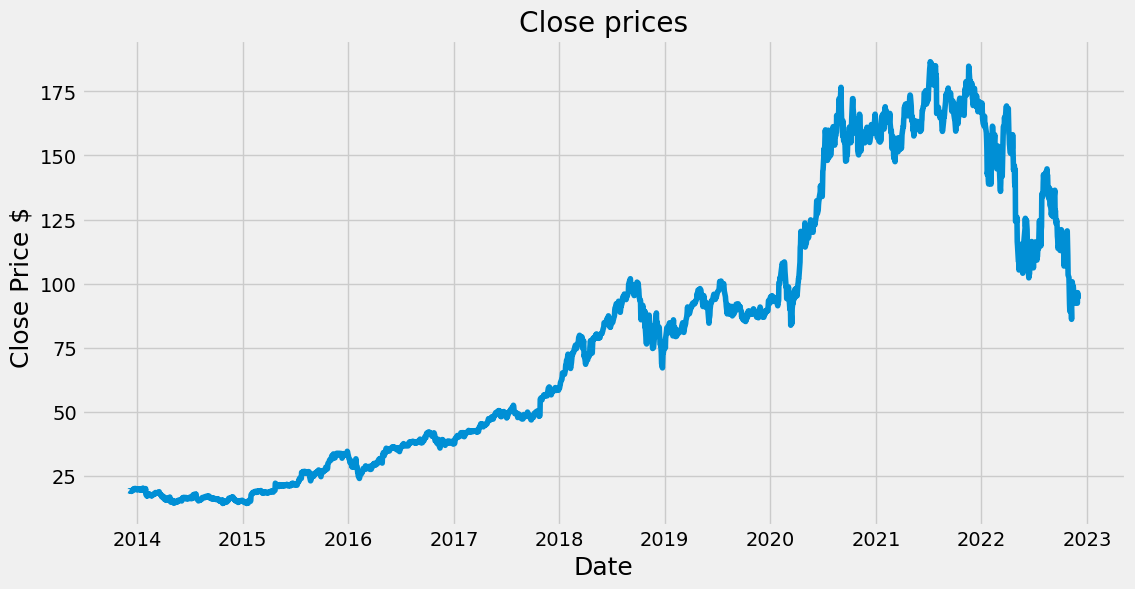

In [30]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Close prices')
plt.plot(df['close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price $ ', fontsize = 18)
plt.show()

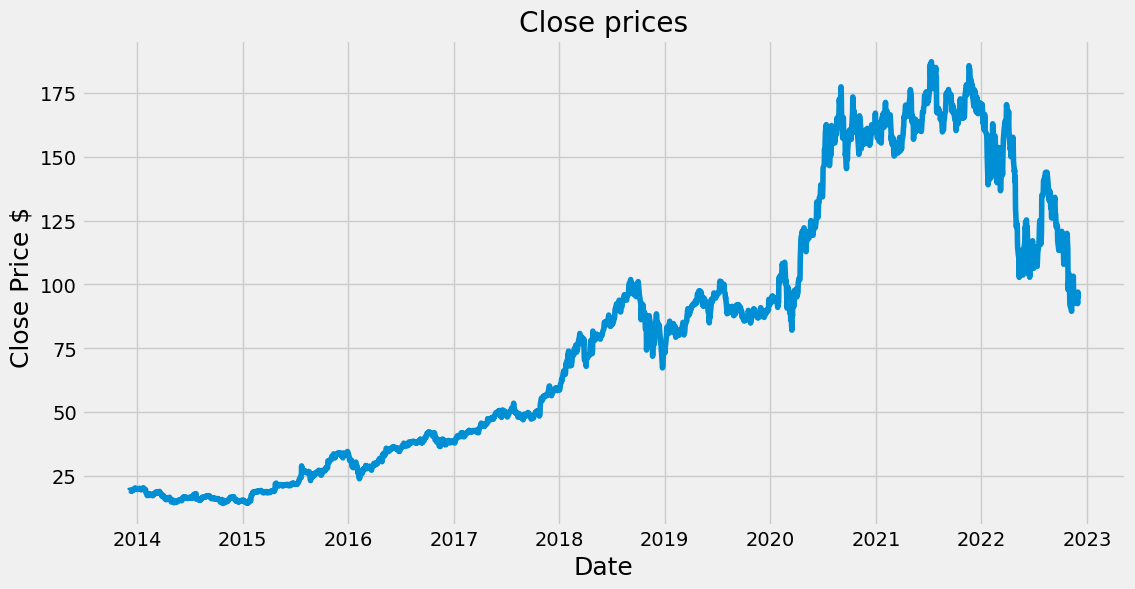

In [28]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Open prices')
plt.plot(df['open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price $ ', fontsize = 18)
plt.show()

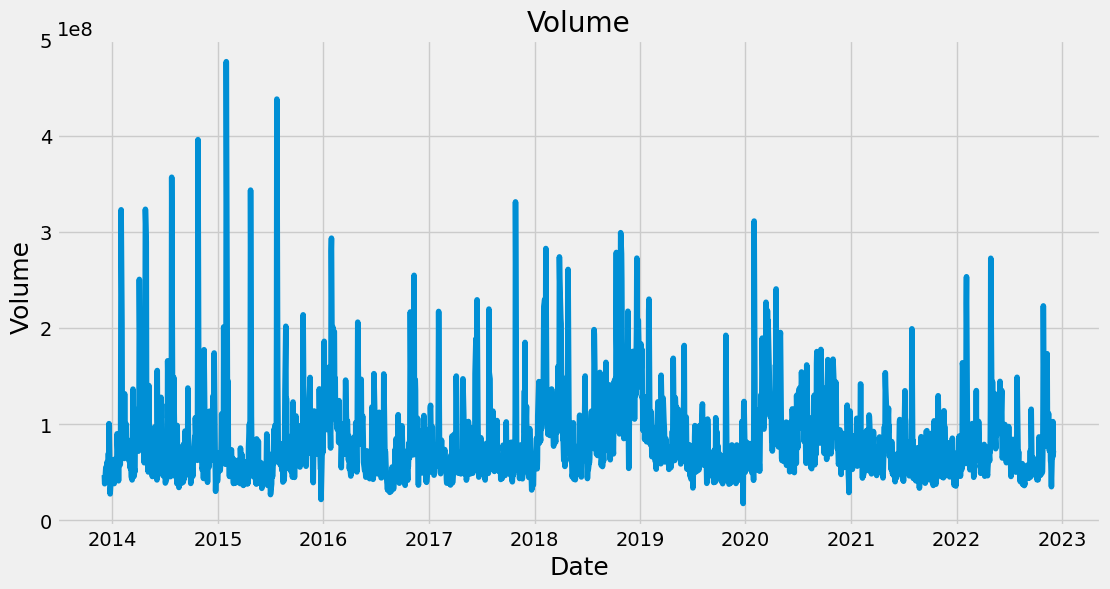

In [31]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Volume')
plt.plot(df['volume'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume ', fontsize = 18)
plt.show()

In [66]:
#exctract close column
data = df.filter(['close'])
#convert data frame in to numpy array
dataset = data.values

#get number of rows to train
train_data_len = math.ceil(len(dataset) * 0.8 )

train_data_len

1813

In [67]:
#scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02874471],
       [0.02831794],
       [0.02903213],
       ...,
       [0.47724464],
       [0.47120595],
       [0.46325113]])

In [84]:
#train data set

train_data = scaled_data[:train_data_len]

#split data
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(X_train)
    print(y_train)


[array([0.02874471, 0.02831794, 0.02903213, 0.02843406, 0.02927309,
       0.0276502 , 0.0273773 , 0.02824536, 0.02961858, 0.02923535,
       0.03164793, 0.03142438, 0.03345953, 0.03366856, 0.03258856,
       0.03409533, 0.0322634 , 0.030896  , 0.03246954, 0.03223147,
       0.03178728, 0.03097147, 0.03224889, 0.03337824, 0.03311405,
       0.03214147, 0.03020212, 0.03210664, 0.0316218 , 0.03160148,
       0.03270759, 0.03486759, 0.03413888, 0.03278308, 0.02922083,
       0.02883761, 0.03120373, 0.02823374, 0.03369468, 0.02082765,
       0.01718703, 0.01770959, 0.01727412, 0.01963733, 0.02152152,
       0.02146055, 0.02172765, 0.01808701, 0.02039507, 0.02043862,
       0.01936443, 0.01754411, 0.01824669, 0.01736411, 0.01882153,
       0.02072023, 0.0211499 , 0.02124571, 0.02181764, 0.0211441 ])]
[0.022340221353582643]
[array([0.02874471, 0.02831794, 0.02903213, 0.02843406, 0.02927309,
       0.0276502 , 0.0273773 , 0.02824536, 0.02961858, 0.02923535,
       0.03164793, 0.03142438, 0.03

In [85]:
# from sklearn.model_selection import train_test_split

# # Split the data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(scaled_data[:, :-1], scaled_data[:, -1], test_size=0.2, random_state=42)

# # Print the shapes of the train and test sets
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

In [86]:
#convert in to numpy arrays
X_train, y_train = np.array(X_train) , np.array(y_train)


In [87]:
#reshape data
X_train = np.reshape(X_train , (X_train.shape[0] , X_train.shape[1] ,1))
X_train.shape

(1753, 60, 1)

In [88]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [89]:
#compile model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [95]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 19.0 MB/s eta 0:00:00


In [96]:
#model training
import tqdm
import tensorflow as tf
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
model.fit(X_train, y_train , batch_size=64 , epochs = 10 , callbacks=[tqdm_callback])

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/28           ETA: ?s - 

Epoch 1/10
28/28 [==============================] - 4s 159ms/step - loss: 3.1055e-04
Epoch 2/10


0/28           ETA: ?s - 

Epoch 2/10
28/28 [==============================] - 6s 213ms/step - loss: 3.0606e-04
Epoch 3/10


0/28           ETA: ?s - 

Epoch 3/10
28/28 [==============================] - 5s 176ms/step - loss: 3.0788e-04
Epoch 4/10


0/28           ETA: ?s - 

Epoch 4/10
28/28 [==============================] - 5s 191ms/step - loss: 2.9555e-04
Epoch 5/10


0/28           ETA: ?s - 

Epoch 5/10
28/28 [==============================] - 4s 153ms/step - loss: 2.8097e-04
Epoch 6/10


0/28           ETA: ?s - 

Epoch 6/10
28/28 [==============================] - 2s 81ms/step - loss: 2.8104e-04
Epoch 7/10


0/28           ETA: ?s - 

Epoch 7/10
28/28 [==============================] - 2s 81ms/step - loss: 2.9424e-04
Epoch 8/10


0/28           ETA: ?s - 

Epoch 8/10
28/28 [==============================] - 2s 81ms/step - loss: 2.7445e-04
Epoch 9/10


0/28           ETA: ?s - 

Epoch 9/10
28/28 [==============================] - 3s 124ms/step - loss: 2.7091e-04
Epoch 10/10


0/28           ETA: ?s - 

Epoch 10/10
28/28 [==============================] - 3s 89ms/step - loss: 3.3009e-04


In [97]:
model.save_weights('LSTM_SMP_1.h5')

In [103]:
#create test data
test_data = scaled_data[train_data_len-60: , :]

X_test = []
y_test = dataset[train_data_len: , :]

for i in range(60 , len(test_data)):
  X_test.append(test_data[i-60 :i , 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0] , X_test.shape[1] , 1))


In [104]:
X_test.shape

(453, 60, 1)

In [108]:
#model predictions
model.load_weights('LSTM_SMP_1.h5')
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 0s 19ms/step


In [109]:
#Model evaluation using RMSE

rmse  = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

7.558167176040522

<ipython-input-110-338826159a69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

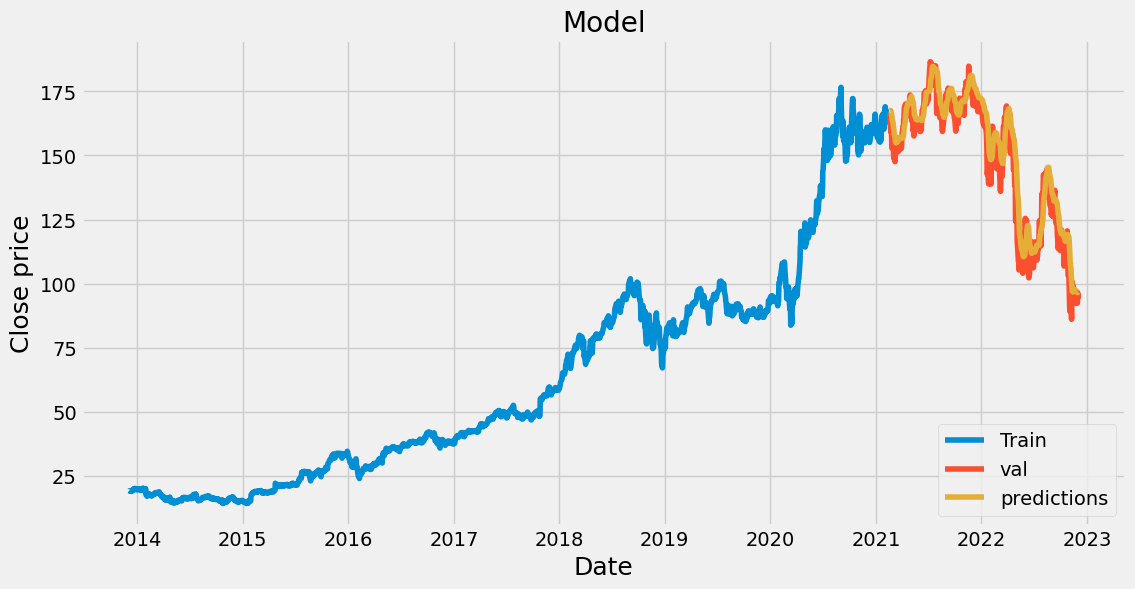

In [110]:
#plot data

train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = predictions

plt.figure(figsize = (12,6))
plt.title('Model')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Close price' , fontsize = 18 )
plt.plot(train['close'])
plt.plot(valid[['close' , 'predictions']])
plt.legend(['Train', 'val', 'predictions'] , loc = 'lower right')
plt.show

In [111]:
#show actual and predicted values
valid

,close,predictions
2021-02-18,166.411499,167.532349
2021-02-19,162.494995,167.579025
2021-02-22,159.037003,167.376144
2021-02-23,159.725006,166.794724
2021-02-24,157.976501,166.130005
...,...,...
2022-11-28,93.949997,96.932808
2022-11-29,92.419998,96.781013
2022-11-30,96.540001,96.551239
2022-12-01,95.500000,96.617256


**Use model**

In [117]:
#Get the stock  data
df= get_data("amzn", start_date="12/04/2013", end_date="12/04/2022")
new_df = df.filter(['close'])
last_100_days = new_df[-100:].values
last_100_days_scaled = scaler.transform(last_100_days)

X_test = []

X_test.append(last_100_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = model.predict(X_test)

pred = scaler.inverse_transform(pred)

print(pred)

1/1 [==============================] - 1s 825ms/step
[[96.82441]]


In [127]:
df= get_data("amzn", start_date="12/01/2022", end_date="12/02/2022")
print(df['close'])

2022-12-01    95.5
Name: close, dtype: float64
